In [1]:
import numpy as num
import pandas as pd
from matplotlib import pyplot as plt
import os
import urllib
%matplotlib inline
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
167554,2021-12-05,ZW,Zimbabwe,AFRO,1082,138523,1,4709
167555,2021-12-06,ZW,Zimbabwe,AFRO,523,139046,1,4710
167556,2021-12-07,ZW,Zimbabwe,AFRO,0,139046,0,4710
167557,2021-12-08,ZW,Zimbabwe,AFRO,6586,145632,8,4718


In [2]:
gr_df = (df.loc[df['Country'] == 'Greece'])
gr_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
57267,2020-01-03,GR,Greece,EURO,0,0,0,0
57268,2020-01-04,GR,Greece,EURO,0,0,0,0
57269,2020-01-05,GR,Greece,EURO,0,0,0,0
57270,2020-01-06,GR,Greece,EURO,0,0,0,0
57271,2020-01-07,GR,Greece,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
57969,2021-12-05,GR,Greece,EURO,5143,962695,89,18516
57970,2021-12-06,GR,Greece,EURO,3526,966221,79,18595
57971,2021-12-07,GR,Greece,EURO,4927,971148,121,18716
57972,2021-12-08,GR,Greece,EURO,7254,978402,99,18815


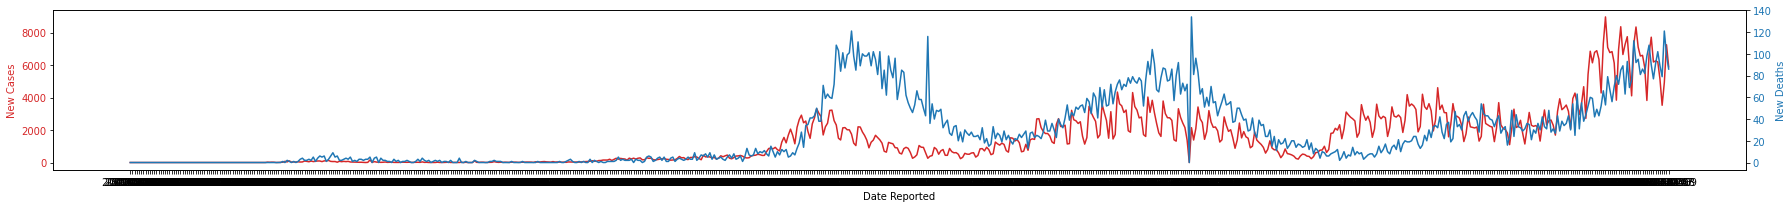

In [3]:
fig = plt.figure(figsize=(25,3))
ax1 = fig.subplots()

color = 'tab:red'
ax1.set_xlabel('Date Reported')
ax1.set_ylabel('New Cases', color=color)
ax1.plot('Date_reported', 'New_cases', color=color,data=gr_df)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('New Deaths', color=color)
ax2.plot('Date_reported', 'New_deaths', color=color,data=gr_df)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

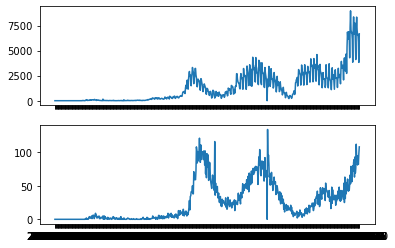

In [4]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot('Date_reported','New_cases',data=gr_df)
ax[1].plot('Date_reported','New_deaths',data=gr_df)
plt.show()